# Personal Information
Name: **Klara Willberg**

StudentID: **12682586**

Email: [**klara.willberg@student.uva.nl**](youremail@student.uva.nl)

Submitted on: **19.03.2023**

# Data Context

The "data" that is being explored in this thesis project is the BioBERT language model. The BioBERT language model is a fine-tuned verision of BERT that was specifically trained on biomedical corpora such as PMc (PubMed Central) full-text documents and PubMed abstracts to enhance ints understanding of biomedical text. This thesis project intends to evaluate the word embeddings of genes within the BioBERT model, and assess to what extent relatedness and similarities between genes can be inferred from biomedical text. 

# Data Description

Below you can find the code for the EDA of BioBERT. This EDA includes exploring how words are tokenized by the BioBERT tokenizer, the distribution of token lengths and the distribution of subword lengths. Moreover, I explore the proportion of subwords compared to the whole BioBERT vocabulary. 

In [ ]:
# Imports
import os
import numpy as np
import pandas as pd

### Data Loading

In [1]:
!pip install pytorch-pretrained-bert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.1/135.1 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 34.0 MB/s eta 0:00:00


In [2]:
pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 20.9 MB/s eta 0:00:00


In [33]:
from transformers import AutoTokenizer, AutoModel
import torch
from scipy.spatial.distance import cosine
from transformers import BertTokenizer, BertModel


#DIFFERENT MODELS OF BIOBERT TO TRY:
#dmis-lab/biobert-base-cased-v1.2: Trained in the same way as BioBERT-Base v1.1 but includes LM head, which can be useful for probing
#dmis-lab/biobert-base-cased-v1.1: BioBERT-Base v1.1 (+ PubMed 1M)
#dmis-lab/biobert-large-cased-v1.1: BioBERT-Large v1.1 (+ PubMed 1M)
#dmis-lab/biobert-base-cased-v1.2: BioBERT-Base v1.2 (+ PubMed 1M + LM head)

# # Load pre-trained BioBERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("dmis-lab/biobert-base-cased-v1.1")
model = BertModel.from_pretrained("dmis-lab/biobert-base-cased-v1.1")


# tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
# model = BertModel.from_pretrained("bert-base-cased")

Some weights of the model checkpoint at dmis-lab/biobert-base-cased-v1.1 were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# inspect BioBERT vocabulary

In [34]:
with open("vocabulary.txt", 'w') as f:
    
    # For each token...
    for token in tokenizer.vocab.keys():
        
        # Write it out and escape any unicode characters.            
        f.write(token + '\n')

In [35]:
one_chars = []
one_chars_hashes = []

# For each token in the vocabulary...
for token in tokenizer.vocab.keys():
    
    # Record any single-character tokens.
    if len(token) == 1:
        one_chars.append(token)
    
    # Record single-character tokens preceded by the two hashes.    
    elif len(token) == 3 and token[0:2] == '##':
        one_chars_hashes.append(token)

In [36]:
print('Number of single character tokens with hashes:', len(one_chars_hashes), '\n')

# Print all of the single characters, 40 per row.

# Strip the hash marks, since they just clutter the display.
tokens = [token.replace('##', '') for token in one_chars_hashes]

# For every batch of 40 tokens...
for i in range(0, len(tokens), 40):
    
    # Limit the end index so we don't go past the end of the list.
    end = min(i + 40, len(tokens) + 1)
    
    # Print out the tokens, separated by a space.
    print(' '.join(tokens[i:end]))

Number of single character tokens with hashes: 997 

s a e n d i y o r t l m h u k g 1 2 3 4 6 7 0 5 9 z A 8 p C c S x b T v E B R f
P M D L I w N F O G K V U é W H X j Y q J ō Q Z á í ć ° ó ₂ à ā ū š а ² ī ₃ ₁ ı
ú ⁺ ë ₄ ý ½ я ă ه α ي å о й н ü и ä ن ø ς د ş č ₀ ń ö е ³ ر ò р ł ₙ ᵢ ì ß ù ة ν
ș ê − م ♭ è ! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ ¡ ¢
£ ¥ § ¨ © ª « ¬ ® ± ´ µ ¶ · ¹ º » ¼ ¾ ¿ À Á Â Ä Å Æ Ç È É Í Î Ñ Ó Ö × Ø Ú Ü Þ â
ã æ ç î ï ð ñ ô õ ÷ û þ ÿ Ā ą Ć Č ď Đ đ ē ė ę ě ğ ġ Ħ ħ ĩ Ī İ ļ Ľ ľ Ł ņ ň ŋ Ō ŏ
ő Œ œ ř Ś ś Ş Š Ţ ţ ť ũ ŭ ů ű ų ŵ ŷ ź Ż ż Ž ž Ə ƒ ơ ư ǎ ǐ ǒ ǔ ǫ Ș Ț ț ɐ ɑ ɔ ɕ ə
ɛ ɡ ɣ ɨ ɪ ɲ ɾ ʀ ʁ ʂ ʃ ʊ ʋ ʌ ʐ ʑ ʒ ʔ ʰ ʲ ʳ ʷ ʻ ʼ ʾ ʿ ˈ ː ˡ ˢ ˣ ́ ̃ ̍ ̯ ͡ Α Β Γ Δ
Ε Η Θ Ι Κ Λ Μ Ν Ο Π Σ Τ Φ Χ Ψ Ω ά έ ή ί β γ δ ε ζ η θ ι κ λ μ ξ ο π ρ σ τ υ φ χ
ψ ω ό ύ ώ І Ј А Б В Г Д Е Ж З И К Л М Н О П Р С Т У Ф Х Ц Ч Ш Э Ю Я б в г д ж з
к л м п с т у ф х ц ч ш щ ъ ы ь э ю ё і ї ј њ ћ Ա Հ ա ե ի կ մ յ ն ո ս տ ր ւ ְ ִ
ֵ ֶ ַ ָ ֹ ּ א ב ג ד ה ו ז ח ט י כ ל ם מ ן נ ס ע פ צ ק ר ש ת ، ء آ أ

In [37]:
print('Are the two sets identical?', set(one_chars) == set(tokens))

Are the two sets identical? True


In [28]:
# tokenizer.vocab.keys()

# How are words tokenized by BioBERT?

In [38]:
# Define the input text
text = "penicillin"

# Tokenize the input text
tokens = tokenizer.encode(text, add_special_tokens=True)

print(tokens)

#Convert the tokens back into words

token_words = tokenizer.convert_ids_to_tokens(tokens)
print(token_words)

[101, 8228, 27989, 23824, 102]
['[CLS]', 'pen', '##ici', '##llin', '[SEP]']


# Distribution of token length in the bioBERT vocabulary

Maximum token length: 18


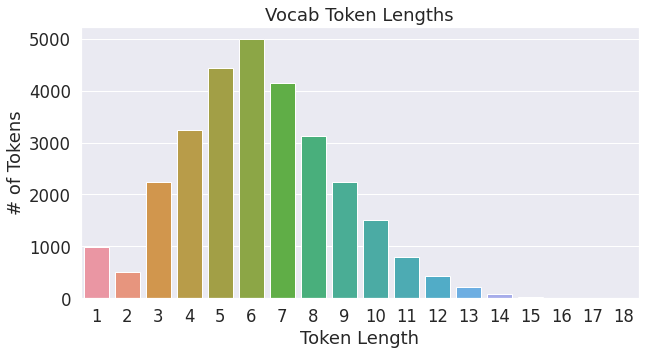

In [39]:


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,5)

# Measure the length of every token in the vocab.
token_lengths = [len(token) for token in tokenizer.vocab.keys()]

# Count the frequency of each token length.
token_lengths_counts = pd.Series(token_lengths).value_counts().sort_index()

# Plot the number of tokens of each length.
sns.barplot(x=token_lengths_counts.index, y=token_lengths_counts)
plt.title('Vocab Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('# of Tokens')

print('Maximum token length:', max(token_lengths))


# Number of subwords (WordPiece tokenization)

In [20]:
num_subwords = 0

subword_lengths = []

# For each token in the vocabulary...
for token in tokenizer.vocab.keys():
    
    # If it's a subword...
    if len(token) >= 2 and token[0:2] == '##':
        
        # Tally all subwords
        num_subwords += 1

        # Measure the sub word length (without the hashes)
        length = len(token) - 2

        # Record the lengths.        
        subword_lengths.append(length)


In [21]:
vocab_size = len(tokenizer.vocab.keys())

print('Number of subwords: {:,} of {:,}'.format(num_subwords, vocab_size))

# Calculate the percentage of words that are '##' subwords.
prcnt = float(num_subwords) / vocab_size * 100.0

print('%.1f%%' % prcnt)

Number of subwords: 6,477 of 28,996
22.3%


In [32]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# sns.set(style='darkgrid')
# sns.set(font_scale=1.5)
# plt.rcParams["figure.figsize"] = (10,5)

# # Measure the length of every subword in the vocab.
# subword_lengths = [len(subword.strip('##')) for subword in tokenizer.vocab.keys() if subword.startswith('##')]

# # Plot the number of ## subwords of each length.
# sns.countplot(subword_lengths)
# plt.title('Subword Token Lengths (w/o "##")')
# plt.xlabel('Subword Length')
# plt.ylabel('# of ## Subwords')

# print('Maximum subword length:', max(subword_lengths))


Text(0, 0.5, '# of ## Subwords')

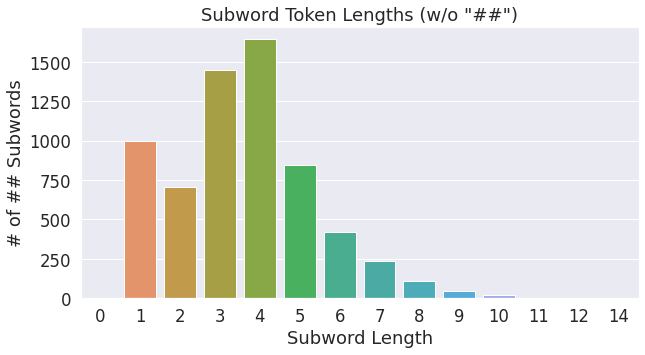

In [40]:
# Measure the length of every subword in the vocab.
subword_lengths = [len(subword.strip('##')) for subword in tokenizer.vocab.keys() if subword.startswith('##')]

# Count the frequency of each subword length.
subword_lengths_counts = pd.Series(subword_lengths).value_counts().sort_index()

# Plot the number of ## subwords of each length.
sns.barplot(x=subword_lengths_counts.index, y=subword_lengths_counts)
plt.title('Subword Token Lengths (w/o "##")')
plt.xlabel('Subword Length')
plt.ylabel('# of ## Subwords')


# Evaluating cosine similarity between some words

In [26]:

# Input words
word1 = "gene"
word2 = "protein"

# Get embeddings for word1
inputs1 = tokenizer(word1, return_tensors='pt')
outputs1 = model(**inputs1)
embedding1 = outputs1.last_hidden_state.mean(dim=1).squeeze()

# Get embeddings for word2
inputs2 = tokenizer(word2, return_tensors='pt')
outputs2 = model(**inputs2)
embedding2 = outputs2.last_hidden_state.mean(dim=1).squeeze()

# Calculate cosine similarity
similarity = 1 - cosine(embedding1.detach().numpy(), embedding2.detach().numpy())

# Print similarity
print("Cosine similarity:", similarity)

Cosine similarity: 0.9467214941978455


# Evaluating euclidean distance between some words

In [ ]:
from scipy.spatial.distance import euclidean

#embeddings from the above code
distance = euclidean(embedding1.detach().numpy(), embedding2.detach().numpy())
print("Euclidean distance:", distance)